In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

In [3]:
modi = pd.read_csv("C:/Users/carme/OneDrive/ドキュメント/Numpy,Pandas/modi_reviews.csv/modi_reviews.csv")
rahul = pd.read_csv("C:/Users/carme/OneDrive/ドキュメント/Numpy,Pandas/rahul_reviews.csv/rahul_reviews.csv")

In [7]:
modi.head(5)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [5]:
modi.shape

(25688, 3)

In [8]:
rahul.head(5)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [9]:
rahul.shape

(14261, 3)

In [10]:
TextBlob(modi['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [11]:
TextBlob(rahul['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

In [13]:
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [15]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

In [16]:
modi

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [17]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667


In [18]:
modi['Label'] = np.where(modi['Polarity']>0,'positive','negative')
modi['Label'][modi['Polarity']==0]='Neutral'

rahul['Label'] = np.where(rahul['Polarity']>0,'positive','negative')
rahul['Label'][rahul['Polarity']==0]='Neutral'

C:\Users\carme\AppData\Local\Temp\ipykernel_41692\2764945159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi['Label'][modi['Polarity']==0]='Neutral'
C:\Users\carme\AppData\Local\Temp\ipykernel_41692\2764945159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul['Label'][rahul['Polarity']==0]='Neutral'


In [19]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,positive
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,Neutral
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,Neutral
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,positive
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,negative


In [20]:
neutral_modi = modi[modi['Polarity']==0.0000]

remove_neutral_modi = modi['Polarity'].isin(neutral_modi['Polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)
print(neutral_modi.shape)
print(modi.shape)

(8207, 5)
(17481, 5)


In [21]:
neutral_rahul = rahul[rahul['Polarity']==0.0000]
remove_neutral_rahul = rahul['Polarity'].isin(neutral_rahul['Polarity'])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)
print(neutral_rahul.shape)
print(rahul.shape)

(4894, 5)
(9367, 5)


In [22]:
print(modi.shape)
print(rahul.shape)

(17481, 5)
(9367, 5)


In [23]:
np.random.seed(10)
remove_n = 8481
drop_indices = np.random.choice(modi.index,remove_n,replace=False)
df_modi = modi.drop(drop_indices)

In [24]:
np.random.seed(10)
remove_n = 367
drop_indices1 = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indices1)

In [25]:
print(df_modi.shape)
print(df_rahul.shape)

(9000, 5)
(9000, 5)


**Prediction of Indian Election**



In [33]:
modi_count = df_modi.groupby('Label').count()
modi_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,2600,2600,2600,2600
positive,6400,6400,6400,6400


In [34]:
rahul_count = df_rahul.groupby('Label').count()
rahul_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,3039,3039,3039,3039
positive,5961,5961,5961,5961


In [42]:
neg_modi = (modi_count['Polarity'].iloc[0] / 1000) * 100
pos_modi = (modi_count['Polarity'].iloc[1] / 1000) * 100

In [44]:
neg_rahul = (rahul_count['Polarity'].iloc[0] / 1000) * 100
pos_rahul = (rahul_count['Polarity'].iloc[1] / 1000) * 10

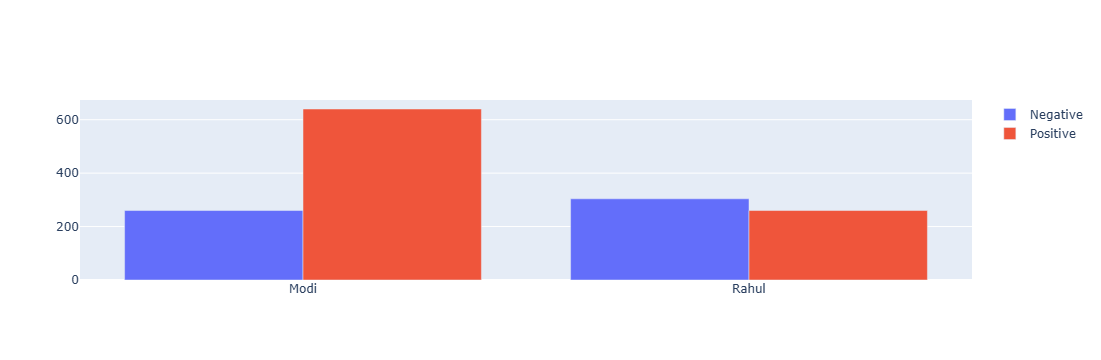

In [46]:
politicians = ['Modi','Rahul']

neg_list = [neg_modi,neg_rahul]
pos_list = [pos_modi,neg_modi]


fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=neg_list),
    go.Bar(name='Positive',x=politicians,y=pos_list)
]
)
fig.update_layout(barmode='group')
fig.show()